JuMP Documentation: https://jump.dev/JuMP.jl/stable/

In [1]:
a = time()

1.632326952392482e9

In [2]:
using LinearAlgebra
using JuMP
using GLPK
using Plots
pyplot()

Plots.PyPlotBackend()

In [3]:
model = Model()
set_optimizer(model, GLPK.Optimizer)

#Define variables
@variable(model, x>=0)
@variable(model, y>=0)

#Define Constraints
@constraint(model, 3x+2y<=66)
@constraint(model, 9x+4y<=180)
@constraint(model, 2x+10y<=200)

#Define Objective
@objective(model, Max, 90x+75y)

#Run the opimization
optimize!(model)

In [4]:
model

A JuMP Model
Maximization problem with:
Variables: 2
Objective function type: AffExpr
`AffExpr`-in-`MathOptInterface.LessThan{Float64}`: 3 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 2 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: GLPK
Names registered in the model: x, y

In [5]:
objective_value(model)

2250.0

In [6]:
objective_sense(model)

MAX_SENSE::OptimizationSense = 1

In [7]:
value.(x)

10.0

In [8]:
value.(y)

18.0

In [9]:
x=LinRange(0, 50, 100)
x

100-element LinRange{Float64}:
 0.0,0.505051,1.0101,1.51515,2.0202,…,47.9798,48.4848,48.9899,49.4949,50.0

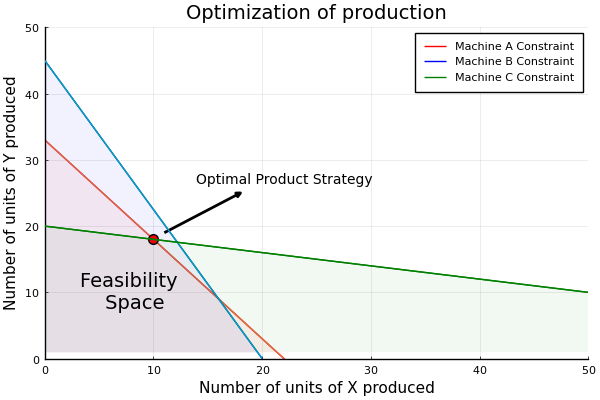

In [10]:
x=LinRange(0, 50, 100)

#Hours constraint for machine A
plot([x], [-1.5x .+ 33], label = "Machine A Constraint", color = "red")
plot!([0,22],[33,0], fillrange = 1, fillalpha = 0.05, fillcolor = "red", label = "")

#Optimal Product Strategy
scatter!([10],[18], marker = true,markercolor = "red", label = "", markersize = 7)
plot!([11,18],[19,25],arrow=true, color=:black,linewidth=2,label="")
annotate!(22, 27, text("Optimal Product Strategy",10))

#Hours constraint for machine B
plot!([x], [-2.25x .+ 45], label = "Machine B Constraint", color = "blue")
plot!([0, 20], [45,0], fillrange = 1, fillalpha = 0.05, fillcolor = "blue", label = "")

#Hours constraints for machine C
plot!([x], [-0.2x .+ 20], label = "Machine C Constraint", color = "green")
plot!([0, 100], [20,0], fillrange = 1, fillalpha = 0.05, color = "green", label = "")

#Set axis limits
plot!(xlims = (0,50), ylims = (0, 50))

#Indicate feasibility space
annotate!(8,10, "Feasibility \n Space")

julia_plot = plot!(xaxis = "Number of units of X produced",
    yaxis = "Number of units of Y produced",
    title = "Optimization of production")

In [11]:
savefig(julia_plot,"Plot using JULIA.png")

In [12]:
b = time()
println(b-a)

40.01340889930725
